In [1]:
# Utilitarios
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import pickle

# Modelos Estatisticos
import xgboost
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm, tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import lightgbm
from sklearn.neural_network import MLPClassifier

# Metricas de desempenho
from sklearn.metrics import confusion_matrix, classification_report, plot_roc_curve

# Comparando os Algoritmos de Machine Learning para Classificação

In [2]:
def models():
    models = []
    models.append(('DTR', DecisionTreeClassifier()))
    models.append(('ADA',  AdaBoostClassifier()))
    models.append(('XGB',xgboost.XGBClassifier(
        objective='binary:logistic',
        booster='gbtree',
        eval_metric='auc',
        tree_method='hist',
        grow_policy='lossguide',
        use_label_encoder=False)
    ))

    models.append(('RF', RandomForestClassifier(max_depth=3)))
    models.append(('MLP', MLPClassifier()))
    models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=1000)))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('LGBM', lightgbm.LGBMClassifier()))
    
    return models

TRAIN_SIZE 4006
TEST_SIZE 1718

DTR
              precision    recall  f1-score   support

           0       0.70      0.76      0.73      1019
           1       0.60      0.53      0.56       699

    accuracy                           0.66      1718
   macro avg       0.65      0.64      0.64      1718
weighted avg       0.66      0.66      0.66      1718

[[772 247]
 [330 369]]


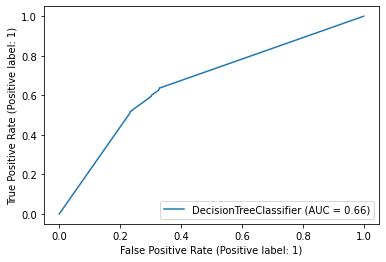



ADA
              precision    recall  f1-score   support

           0       0.73      0.81      0.77      1019
           1       0.67      0.57      0.61       699

    accuracy                           0.71      1718
   macro avg       0.70      0.69      0.69      1718
weighted avg       0.71      0.71      0.71      1718

[[825 194]
 [303 396]]


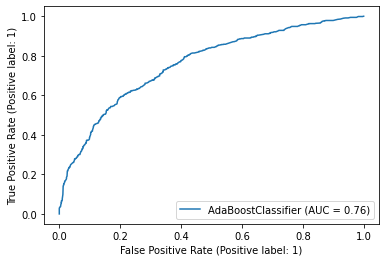



XGB
              precision    recall  f1-score   support

           0       0.74      0.77      0.76      1019
           1       0.65      0.61      0.63       699

    accuracy                           0.71      1718
   macro avg       0.70      0.69      0.69      1718
weighted avg       0.70      0.71      0.70      1718

[[789 230]
 [274 425]]


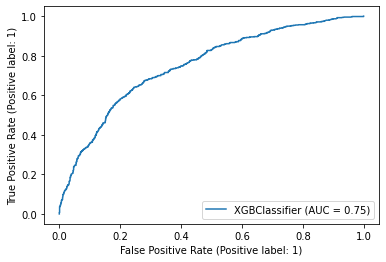



RF
              precision    recall  f1-score   support

           0       0.73      0.82      0.77      1019
           1       0.68      0.55      0.61       699

    accuracy                           0.71      1718
   macro avg       0.70      0.69      0.69      1718
weighted avg       0.71      0.71      0.71      1718

[[836 183]
 [313 386]]


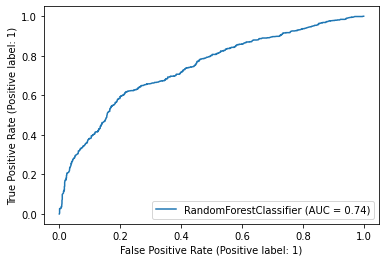



MLP
              precision    recall  f1-score   support

           0       0.73      0.77      0.75      1019
           1       0.64      0.59      0.61       699

    accuracy                           0.70      1718
   macro avg       0.69      0.68      0.68      1718
weighted avg       0.69      0.70      0.69      1718

[[788 231]
 [289 410]]


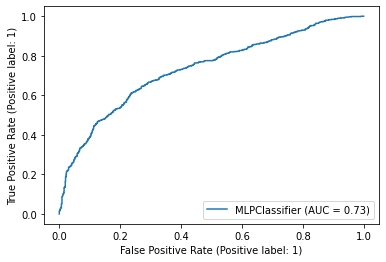



LR
              precision    recall  f1-score   support

           0       0.64      0.82      0.72      1019
           1       0.55      0.32      0.41       699

    accuracy                           0.62      1718
   macro avg       0.60      0.57      0.56      1718
weighted avg       0.60      0.62      0.59      1718

[[836 183]
 [472 227]]


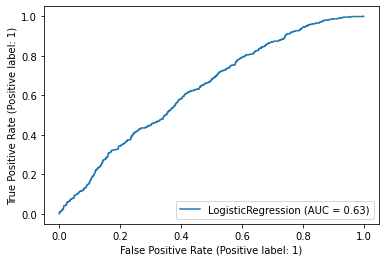



KNN
              precision    recall  f1-score   support

           0       0.73      0.79      0.76      1019
           1       0.65      0.58      0.62       699

    accuracy                           0.70      1718
   macro avg       0.69      0.69      0.69      1718
weighted avg       0.70      0.70      0.70      1718

[[803 216]
 [292 407]]


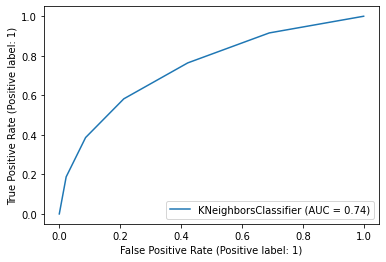



LGBM
              precision    recall  f1-score   support

           0       0.74      0.80      0.77      1019
           1       0.67      0.60      0.63       699

    accuracy                           0.72      1718
   macro avg       0.71      0.70      0.70      1718
weighted avg       0.71      0.72      0.71      1718

[[812 207]
 [281 418]]


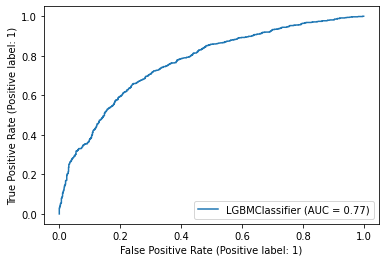

In [3]:
df_occurrence_temp = pd.read_csv('./datasets/processed/BD_Cotton_Safra_Occurrence_And_Temp.csv', delimiter = ';', index_col=0)

x_train_ = df_occurrence_temp.drop(['ocorrencia'], axis = 1)
y_train_ = df_occurrence_temp.loc[:,'ocorrencia']

X_train, X_test, y_train, y_test = train_test_split(x_train_, y_train_, test_size=0.30, random_state=314)

print ('TRAIN_SIZE', len(X_train))
print ('TEST_SIZE', len(X_test))
print ()

for name, model in models():
    print (name)
    model.fit(X_train, y_train)
    y_true = y_test
    y_pred = model.predict(X_test)
       
    print (classification_report(y_true, y_pred))
    print (confusion_matrix(y_true, y_pred))
    plot_roc_curve(model, X_test, y_test)
    plt.show()
    print ()
    print ()

In [4]:
import requests
import json
from random import randint

def get_estagio(idade_atual):
    if int(idade_atual) <= 35:
        return 0
    elif int(idade_atual) > 35 and int(idade_atual) <= 70:
        return 1
    elif int(idade_atual) > 70 and int(idade_atual) <= 110:
        return 2
    elif int(idade_atual) > 110:
        return 3

def get_random_idade_estagio():
    idade = randint(0, 150)
    estagio = get_estagio(idade)
    return idade, estagio

def get_current_temperature(id_city):
    print (f'FIND CURRENT TEMP IN {id_city}')
    
    req = requests.get(f'https://openweathermap.org/data/2.5/weather?id={id_city}&appid=439d4b804bc8187953eb36d2a8c26a02')
    return json.loads(req.content.decode('utf-8'))

In [5]:
import numpy as np
from xgboost import plot_importance

best_model = models()[-1][1]

best_model.fit(x_train_, y_train_)

print ('BEST MODEL TRAINED')

best_model

BEST MODEL TRAINED


LGBMClassifier()

In [6]:
current_temp_paranapanema = get_current_temperature('3455061')

idade, estagio = get_random_idade_estagio()

print (f'IDADE : {idade} | ESTAGIO : {estagio}')
new_value = np.array([[
    current_temp_paranapanema['main']['temp'],
    current_temp_paranapanema['main']['temp_min'],
    current_temp_paranapanema['main']['temp_max'],
    current_temp_paranapanema['main']['pressure'],
    current_temp_paranapanema['main']['humidity'],
    current_temp_paranapanema['wind']['speed'],
    current_temp_paranapanema['wind']['deg'],
    current_temp_paranapanema['clouds']['all'],
    estagio,
    idade
]])

pred = best_model.predict_proba(new_value)
print ('PROBABILIDADE DE OCORRENCIA : {0:.2f}%'.format( pred[0][1]*100 ))

FIND CURRENT TEMP IN 3455061
IDADE : 78 | ESTAGIO : 2
PROBABILIDADE DE OCORRENCIA : 17.50%


In [7]:
pickle.dump(best_model, open('model.pkl','wb'))